# Clustering:
# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Preprocessing

In [2]:
'''
Looking at Source IP Country Code

'''

# Reading the CSV file
df = pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")

# Extracting the unique country codes from the 'src_ip_country_code' column
unique_countries = df["src_ip_country_code"].unique()
print("Unique country codes:", unique_countries)


# 7 Countries Total
# AE : United Arab Emirates
# US : United States
# CA : Canada
# NL : Netherlands
# DE : Germany (Deutschland)
# AT : Austria
# IL : Israel


'''
 - Classifying the IP addresses by First Octet
 - The term "octet" in networking and IP addresses refers to each 8-bit number separated by dots in an IP address
'''


column_name = df.columns[4]  # gets the name of the 5th column
df[column_name] = df[column_name].apply(lambda x: int(str(x).split('.')[0]))


'''
Mapping src_ip_country_code to numbers
AE : 1
US : 2
CA : 3
NL : 4
DE : 5
AT : 6
IL : 7
'''
mapping = {
    'AE' : 1,
    'US' : 2,
    'CA' : 3,
    'NL' : 4,
    'DE' : 5,
    'AT' : 6,
    'IL' : 7
}

df['src_ip_country_code'] = df['src_ip_country_code'].map(mapping)


Unique country codes: ['AE' 'US' 'CA' 'NL' 'DE' 'AT' 'IL']


# Importing modifed Dataset for the X values

In [3]:
# Only using Source IP Country Code and Source IP (columns) for X
X = df.iloc[:, [0,1,4,5]].values

# Using WCSS (elbow) method to determine number of clusters needed

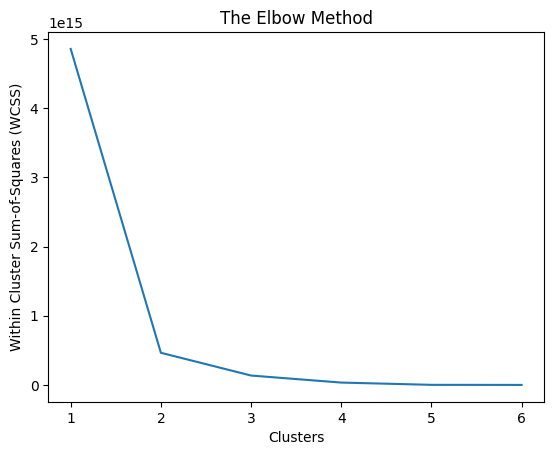

In [4]:

wcss = [] # Within Cluster Sum-of-Squares
for i in range(1,7): # Number of estimated clusters
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum-of-Squares (WCSS)')
plt.show()

# From the Plot it shows that the optimal number of clusters to be used is 3

# Training the K-Means model 

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the Clusters

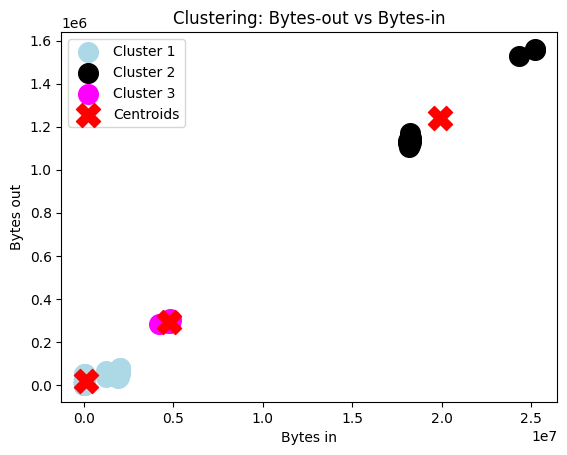

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=200, color='lightblue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=200, color='black', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=200, color='magenta', label='Cluster 3')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("Clustering: Bytes-out vs Bytes-in")
plt.xlabel("Bytes in")
plt.ylabel("Bytes out")
plt.legend()
plt.show()

# Adding the column 'group' to existing database

In [7]:
''' 
Adding the y_kmeans to the dataframe, so a classifier model can be trained using this column as the output label
'''
df['group'] = y_kmeans

# Using Decision Tree Classification method to train the dataset with new column 'group'

In [8]:
'''
After using K-means algorithm, the algorithm used 3 clusters to group the whole dataset. A new column (group) was added to the dataframe
and is now the target/output to train a classification model. In this case, Decision Tree Classification model is used as the classifier.
'''

# Importing corresponding libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Uploading the dataset in a new X and output (y)
X_new = df.iloc[:, [0,1,4,5]].values
y = df.iloc[:, -1].values

# Dividing the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the dataset
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60  0  0]
 [ 0  5  0]
 [ 0  0  6]]


1.0

Using 75% of the dataset for training and 25% of the dataset for testing, the classifier method predicted with 100% accuracy groups 1, 2 or 3 giving some input information such as bytes in, bytes out, source IP and source IP country code. There are 60 in group 1, five in group 2 and six in group 3.